# Introducción a Machine Learning

## Aprendizaje Supervisado - Clasificación

En este notebook comenzamos a trabajar en los problemas de **Clasificación**, una de las tareas más importantes dentro de Machine Learning (dentro, a su vez, de lo que llamamos Aprendizaje Supervisado). Clasificación en Machine Learning consiste en aprender etiquetas discretas *y* a partir de un conjunto de features *X* (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias.

Vamos a comenzar introduciendo un dataset sintético de dos features y dos clases. Y trataremos de aprender a clasificarlo usando nuestro primer modelo, un Árbol de Decisión. Haremos esto utilizando la librería Scikit-Learn. Como la mayoría de las librerías que usamos hasta ahora, tiene una documentación excelente, muy detallada y con ejemplos de uso. Muchas veces, para aprender a usar alguna herramienta de Scikit-Learn basta con copiar estos ejemplos y empezar a *jugar* con ellos. También contiene introducciones teóricas a muchos de los temas que son claras y concisas. Por último, ten en cuenta lo que vimos de funciones y programación orientada a objetos, hará mucho más fácil la comprensión de esta documentación.

### 1. Ejemplo demostrativo

Ahora sí, empecemos con un ejemplo *de juguete*.

#### 1.1 Generando nuestro dataset

Vamos a generar automáticamente un grupo de 1000 instancias con features llamados *x1* y *x2* - agrupados en una única variable `X`- a los cuales les vamos a asignar una etiqueta `y`, la cual puede valer 0 y 1. Esto lo haremos utilizando una función que ya viene incorporada en Scikit-Learn, `make_blobs`. Puede consultar la información sobre los datasets que ya vienen incorporados en Scikit-Learn [aquí](https://scikit-learn.org/stable/datasets/index.html#generated-datasets).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda genera nuestro dataset sintético.

In [ ]:
from sklearn.datasets import make_blobs
#creo datos con dos valores de clasificacion (centroides, centros)

X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=1, cluster_std=3)
#me genera una nube de puntos de par x,y. cada par tiene un atributo numerico o "etiqueta"
#random_state=1  #esto ayuda para que sea replicable y no te haga valores distintos del modelo.
#genero datos semiestocasticos de mi semilla, le doy una condicion inicial (mi semilla)

#center es la cantidad de "etiquetas y" que tiene  mi nube de puntos
#cluster_std= indica cuan separados o concentrados estan la nube de puntos

#cuanto más chico esos valores más separados las etiquetas

Ahora vamos a graficar las diferentes instancias que generamos como puntos en el plano (x1,x2) y les asignamos un color distinto segun cual sea su etiqueta `y`:

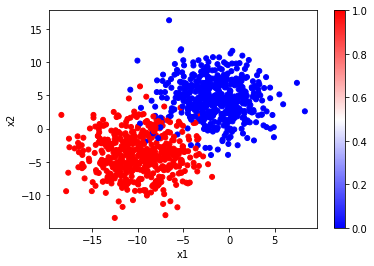

In [ ]:

plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### 1.2 Modelo: Árbol de decisión

El primer modelo de clasificación que vamos a utilizar es un Árbol de decisión. Veremos en detalle árboles de decisión durante el siguiente encuentro. Por ahora basta que consideres que es un objeto que, dadas varias instancias con un determinados grupo de features **X** y unas determinadas etiquetas objetivo **y**, el árbol de desición aprende **automáticamente** reglas (de mayor a menor importancia) sobre cada feature de manera de poder decidir qué etiqueta le corresponde a cada instancia.

Si queremos entrenar un árbol de decisión para clasificar nuestras instancias, primero debemos crear un objeto correspondiente al modelo. Este objeto será de de la clase `DecisionTreeClassifier`, la cual importamos desde la librería Scikit-Learn. Te recomendamos **fuertemente** que te vayas familiarizando con su documentación, no importa si por ahora no entiendes todo. Durante el próximo encuentro veremos más en detalle el funcionamiento de este modelo.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)


################################
#max_depth  int, default=None ---->> es un hiperparámetro
#The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

#Es la profundidad del arbol (cuántas veces hago división del arbol), cuantas veces voy a dividir los datos  en el espacio vectorial(la cantidad de ramas)
#uno lo puede elegir, pero hay una forma de elegir el óptimo, depende de los datos y cómo interactúan entre sí (importa cómo se relacionan respecto a la naturaleza del problema)
#al cambiar el hiperparametro, modifica las predicción



####################################################
#random_state  int, RandomState instance, default=None
# Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. 
#help(DecisionTreeClassifier)



Hasta ahora, lo único que hicimos fue crear el objeto, nada más.

Una vez que nuestro modelo fue creado, precisamos entrenarlo sobre nuestros datos. Esto lo logramos con el método `fit(...)` que poseen **todas** las clases correspondientes a modelos de Scikit-Learn.

In [ ]:
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**¿Qué ocurrió?**

El modelo ya está entrenado. Esto significa que contamos con una herramienta que, dadas ciertas características de una instancia - pares (*x1* y *x2*) - nos devuelve qué etiqueta *y* el modelo cree que le corresponde. Esto lo podemos hacer utilizando el método `predict(...)`, que también poseen **todas** las clases correspondientes a modelos de Scikit-Learn. Veamos algunos ejemplos:

1. Inventando instancias

In [ ]:
### Inventamos una instancia

instancia = np.array([4,0]) # el primer valor corresponde a x1 y el segundo x2
instancia = instancia.reshape(1,-1) # No te preocupes por ahora por el reshape. Es un requisito que quedará más claro después
y_pred = tree.predict(instancia) # Hacemos la predicciṕn
print(y_pred) # imprimimos en pantalla la predicción

[0]


¿Estás de acuerdo con la etiqueta asignada? Mirá en el gráfico del set de entrenamiento si estás de acuerdo con la etiqueta que nos devolvió.

2. Tomando instancias del set de entrenamiento.

In [ ]:
### Tomamos las instancias al azar
np.random.seed(7) # si quieres que sea al azar, cambia la semilla o comenta esta linea.
#n = 3
idxs = np.random.randint(X.shape[0], size=3)
instancias = X[idxs,:]
print(instancias)

[[-0.47627582  6.58305754]
 [ 1.54735496  4.52760416]
 [-9.70937008 -3.49719152]]


In [ ]:
### Predecimos
y_pred = tree.predict(instancias)
print(y_pred)

[0 0 1]


In [ ]:
### Comparamos la etiqueta real con la predicha:

for i, idx in enumerate(idxs):
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')

Instancia 175. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 196. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 537. Etiqueta real: 1. Etiqueta predicha: 1


Ejecuta varias veces las tres celdas superiores. ¿El modelo acierta siempre?

In [ ]:
#CONSULTA!!!
#-->¿qué haría que falle? hay algun parametro que genere ese fallo?
# Selecciona alguna instancia cuya etiqueta no funcione y observa sus valores. ¿Por qué crees que falla? Por ejemplo, la 874:

k = 874
print(X[k,:])

[-10.71981401  -6.52036272]


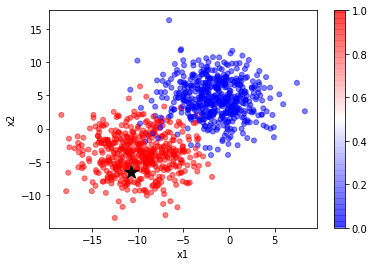

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='bwr', alpha = 0.5)
plt.colorbar()
plt.scatter(X[k, 0], X[k, 1], c = 'k', s=200, cmap='bwr', marker = '*') #marcamos el elemento en la nube
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Volvamos sobre un aspecto del clasificador: dadas características *x1* y *x2* de una instancia, nos dice qué etiqueta *y* (0: azul, 1: rojo) le corresponde. Podemos pensar que el clasificador *pinta* el plano *x1*,*x2* de acuerdo al color que cree que corresponde. Si hay regiones azules y regiones rojas, debe existir una frontera donde el color cambie. Tratemos de visualizarla. **(hay que saber separar los grupos de forma eficiente)**

La función que definimos en la siguiente celda nos permite explorar cómo es el dominio de decisión de nuestro arbol una vez que lo entrenamos.

In [ ]:
# Función que nos ayuda a graficar
# No hace falta que comprendan este bloque de código.

def visualize_classifier(model, X, y, ax=None, cmap='bwr'):
    ax = ax or plt.gca() #genera un elemento para graficar
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha = 0.5) #graficamos los puntos predichos (entrenados)
    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
#     ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200)) #genero la grilla en la que se mueven los puntos--->esta es la frontera!!
#Return coordinate matrices from coordinate vectors.
#https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html?highlight=meshgrid#numpy.meshgrid
    print(xx.shape)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) #genero el modelo predictivo
    print(Z.shape)
#Translates slice objects to concatenation along the second axis.. Es como una Concatenacion de ARRAYS!!
#https://numpy.org/doc/stable/reference/generated/numpy.c_.html


    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)                            #hace un contorno relleno donde se cumple la predicción, es decir el cluster de la frontera. en funcion del mesh

    ax.set(xlim=xlim, ylim=ylim)
    

(200, 200)
(200, 200)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'clim'


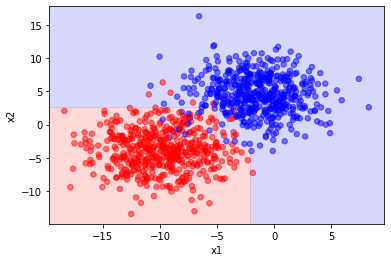

In [ ]:
visualize_classifier(tree, X, y) #genera la frontera para 

En este gráfico aquellos puntos (instancias) que queden sobre un fondo de su mismo color son aquellos que están bien clasificados por el modelo. Esto quiere decir que que si usamos el modelo para calificar su etiqueta *y* a partir de sus coordenadas *x1* y *x2*, éste nos daría la misma etiqueta original del punto. En cambio, aquellos puntos que queda sobre un fondo de otro color son puntos para los cuales el modelo nos estaría dando una etiqueta distinta a la etiqueta original de esa instancia.

Nos podríamos preguntar luego: ¿cuál es el porcentaje de instancias bien clasificadas por el modelo? Para responder esto usaremos nuevamente el método `predict` sobre todo el dataset `X`. Luego con la función `accuracy_score` podemos calcular el porcentaje de aciertos que obtenemos al comparar nuestra predicción `y_pred` contra la clase original `y`. Recomendamos mirar la documentación de esta función, por ahora simplemente diremos que es una de las tantas **métricas** que utilizamos para evaluar nuestros modelos, y lo que hace es devolvernos un porcentaje de aciertos.

In [ ]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y_pred,y)

0.973

Esto quiere decir que el clasificador asigna la etiqueta correcta en el 90.5% de los casos.

Otra forma de ver los resultados de nuestro clasificador es la **matriz de confusión**. La matriz de confusión es una tabla de doble entrada, donde un eje corresponde a la etiqueta real y otro a la etiqueta predicha. En la diagonal encontramos los aciertos, mientras que por fuera de la diagonal aquellas instancias mal clasificadas. Nuevamente, recomendamos ver la documentación.

In [ ]:
#            real
#            si    no
#predicho si
#         no__________
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))


[[487  13]
 [ 14 486]]


Una forma más interesante de ver esta información es con la función `plot_confusion_matrix`:

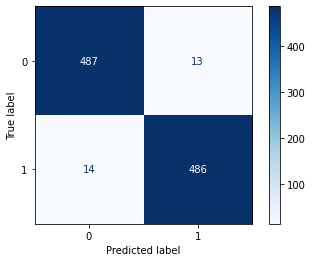

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.0f') 
#es un heatmap de doble entrada


O podemos obtener una versión **normalizada:**

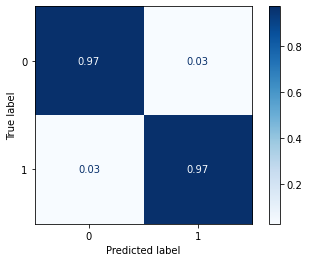

In [ ]:
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.2f', normalize= 'true') #porcentaje

**Challenge - Para pensar y probar**:
1. ¿Qué ocurre si modificas el valor de `cluster_std` en la función `make_blobs`?¿En qué casos será más fácil - o difícil - la tarea de clasificación?
2. ¿Qué ocurre si modificas el valor de `centers` en la función `make_blobs`?¿En qué cambia la formulación del problema de clasificación?
3. Hay algunas características de esta formulación que tal vez te llamen la atención. En el caso binario, un problema de clasificación consiste en encontrar una **frontera** entre puntos que deje a un lado los que pertenecen a una clase, y del otro lado los puntos de la otra clase. Para convencerse (¡o no!):
    1. Elegir un problema de Clasificación Binario (al estilo Spam/No-Spam, Titanic Sobrevivió/No-Sobrevivió, etc.). Inventar - a mano - dos atributos, algunas instancias, y graficar. Luego, dibujar una frontera de decisión (siempre a mano, no tienen que programar). Un ejemplo podría ser: para clasificar vinos blancos y vinos tintos, un atributo podría ser el color y el otro podría ser el dulzor.
    2. ¿Qué ocurre si en lugar de dos atributos tenemos tres?¿Qué forma tendrá la frontera? Y si en vez de tres atributos tenemos cuatro?¿Se podrá visualizar?
    3. **Extra:** googlea qué es la maldición de la dimensión/dimensionalidad (curse of dimensionality).



### 2. Iris Dataset

Como no podía ser de otra manera, vas a entrenar un `DecisionTreeClassifier` sobre el Iris Dataset. Te dejamos algunas consignas de guía.

1. Cargar los datos. Usar la función `load_iris` de Scikit-Learn. ¿Qué tipo de dato devuelve? Pasar a un dataframe de Pandas (¡Googlear!). Prestar atención a `target` y a `target_names`.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import datasets 
iris = datasets.load_iris() #es un diccionario y veo los datos y las llaves (veo los distintos arrays del diccionario)
 
#iris = load_iris(return_X_y=True) #Load and return the iris dataset (classification). --> me devuelve el par x1x2 con la clasificacion por especie
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
#sklearn.datasets.load_iris(*, return_X_y=False, as_frame=False)[source]¶
  #return_X_y, default=False.
    #If True, returns (data, target) instead of a Bunch object. See below for more information about the data and target object.
#https://medium.com/analytics-vidhya/exploration-of-iris-dataset-using-scikit-learn-part-1-8ac5604937f8



#https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787286382/1/ch01lvl1sec13/viewing-the-iris-dataset-with-pandas (anda para atras y para adelante hay paso a paso)
iris.data
iris.data.shape #(150, 4)
iris.feature_names #['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Y=iris.target
y=list(iris.target) #mis clasificadores

print(y)
iris.target.shape #es igual a la cantidad de elementos 150
iris.target_names #['setosa', 'versicolor', 'virginica']
y=list(map(int,y))
for i in range(len(y)):
  if y[i]<1:
    y[i]='setosa'
  elif y[i]>1:
    y[i]='virginica'
  else:
    y[i]='versicolor'
#y[y == 1]= iris.target_names[1]
#y[y == 2]= iris.target_names[2]



#pasar a DATAFRAME
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# Using 'categoria' as the column name  and equating it to the list 
iris_df['categoria'] = y  

print(iris_df)
#for class_number in np.unique(iris.target):
#    plt.figure(1)
#    iris_df['sepal length (cm)'].iloc[np.where(iris.target == class_number)[0]].hist(bins=30)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  categoria
0                  5.1               3.5  ...               0.2     setosa
1                  4.9               3.0  ...               0.2     setosa
2                  4.7               3.2  ...               0.2     setosa
3                  4.6               3.1  ...               0.2     setosa
4                  5.0               3.6  ...               0.2     setosa
..                 ...               ...  ...               ...        ...
145                6.7  

2. Realiza un `pairplot` de Seaborn. Elige dos variables predictoras - atributos - que te parezca que separan correctamente las clases. ¿Cuán fácil - o difícil - te parece que será la tarea de clasificación?

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

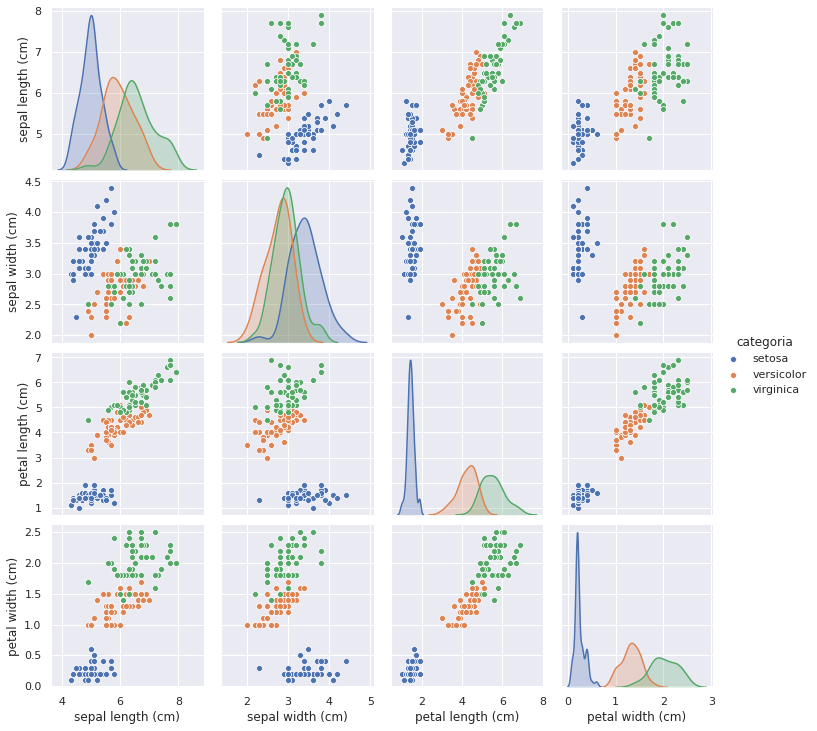

In [ ]:
import seaborn as sns
sns.set()
sns.pairplot(iris_df,hue='categoria')

iris.data
iris.data.shape #(150, 4)
iris.feature_names #['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#las variables predictoras que separan bien las clases son petal leng  sepal width
#x1=iris_df['petal length (cm)']
#x2=iris_df['sepal length (cm)']
#Y=iris.target y=lista con nombres
#¿Cuán fácil - o difícil - te parece que será la tarea de clasificación?
#la dificultad dependera de cuanto se puedan separar las variables con sus etiquetas

3. Separar del dataframe los atributos que elegiste (recuerda empezar por dos) y las etiquetas. Llamar `X` a los features e `y` a las etiquetas.

In [ ]:
import pandas as pd
#las variables predictoras que separan bien las clases son petal leng  sepal width
#x2=iris_df['sepal length (cm)']
Y=iris.target 
y=iris.target  #etiquetas con nombres

print(y)
print(y.shape)
#The shape of X should be [n_samples, n_features], you can transform X by
#X = X[:, None]
X=iris.data[:,2]             #petal length   =x1=iris_df['petal length (cm)']
X=np.c_[X,iris.data[:,0]]    #sepal length   =x2=iris_df['sepal length (cm)']
print(X.shape)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)
(150, 2)


4. Crear un DecisionTreeClassifier con `max_depth = 2` y `random_state = 42`.

In [ ]:
# Creamos un objeto arbol
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2, random_state = 42)

#X=X.reshape(-1,1)
#https://stackoverflow.com/questions/46638641/how-to-fix-valueerror-expected-2d-array-got-1d-array-instead-in-sklearn-pyth

5. Entrenar el DecisionTreeClassifier que creaste.

In [ ]:
#Entrenamos el arbol en funcion de los elementos de mi dataframe
#calcula los parámetros del árbol
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

6. Explorar algunas características del modelo entrenado.

In [ ]:
#esto es muy importante!!!! revisar lo de andres

print(tree.classes_) #son las etiquetas de mi arbol ['setosa' 'versicolor' 'virginica']
print(tree.n_classes_) #cantidad de elementos de etiqueta
print(tree.max_features_) #cantidad de features X variables de entrada
 print(tree.feature_importances_) #me indica la importancia entre ambas variables. en este caso una es de lejos la que mas importancia tiene sobre otra

[0 1 2]
3
2
[1. 0.]


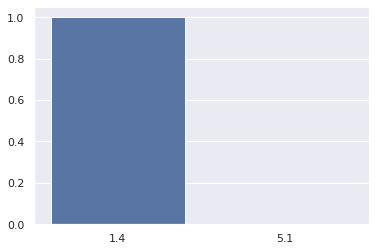

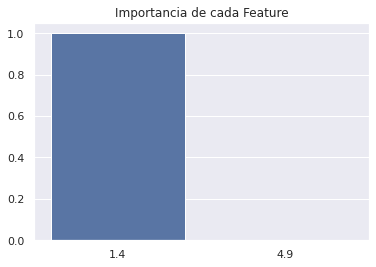

In [ ]:
#Expolica la importancia de las variables de entrada respecto a otras
importances = tree.feature_importances_
sns.barplot(X[0,:], importances)
plt.show()
sns.barplot(X[1,:], importances)
plt.title('Importancia de cada Feature')
plt.show()

7. Predecir con el modelo las etiquetas sobre todo `X`.

In [ ]:
### Inventamos una instancia
y_pred = tree.predict(X) # Hacemos la predicciṕn
print(y_pred) # imprimimos en pantalla la predicción

### Tomamos las instancias al azar
np.random.seed(7) # si quieres que sea al azar, cambia la semilla o comenta esta linea.
idxs = np.random.randint(X.shape[0], size=3)
instancias = X[idxs,:]
print(instancias)
### Predecimos
y_pred = tree.predict(instancias)
print(y_pred)
### Comparamos la etiqueta real con la predicha:
for i, idx in enumerate(idxs):
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1.6 5. ]
 [4.1 5.8]
 [5.6 6.3]]
[0 1 2]
Instancia 25. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 67. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 103. Etiqueta real: 2. Etiqueta predicha: 2


8. Evaluar la performance del modelo usando `accuracy_score` y `confusion_matrix`. ¿Cuáles clases se confunden entre sí?

0.9533333333333334
[[50  0  0]
 [ 0 44  6]
 [ 0  1 49]]


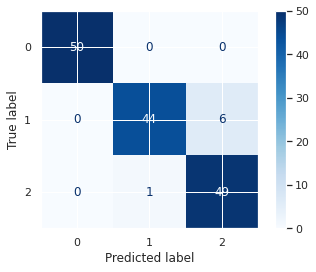

In [ ]:
from sklearn.metrics import accuracy_score
# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X)
# Comaparamos con las etiquetas reales
Ac=accuracy_score(y_pred,y)
print(Ac) #presicion 75%aprox

#            real
#            si    no
#predicho si
#         no__________
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.0f') #es un heatmap de doble entrada


9. Visualiza las fronteras de decisión obtenidas. Te dejamos el código para hacerlo:

(32, 32)
(32, 32)


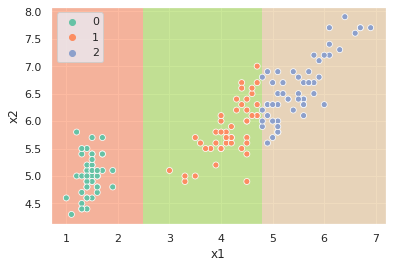

In [ ]:
import seaborn as sns
import pandas as pd
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


plt.figure()
ax = sns.scatterplot(X[:,0], X[:,1], hue=y_pred, palette='Set2', zorder=3) #graficamos los puntos predichos (entrenados) #iris_df.iloc[:,0] iris_df.iloc[:,2]
plt.legend()#.remove()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.axis('tight')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
xx, yy = np.meshgrid(np.linspace(*xlim, num=32),np.linspace(*ylim, num=32))
#https://www.kaggle.com/macespinoza/classification-decision-trees-and-k-nearest/notebook
print(yy.shape)
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
print(Z.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.6,levels=np.arange(n_classes + 1) - 0.5,cmap='Set2',zorder=1)#, clim=(y.min(), y.max()))                            #hace un contorno relleno donde se cumple la predicción, es decir el cluster de la frontera. en funcion del mesh
ax.set(xlim=xlim, ylim=ylim)
plt.show()

10. ¿Qué ocurre con el desempeño a medida que aumentan `max_depth`?¿Y con las fronteras de decisión obtenidas? Vuelve a correr todas las celdas, pero inicializando el `DecisionTreeClassifier` con 
valores más altos de `max_depth`.


(150, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1.6 5. ]
 [4.1 5.8]
 [5.6 6.3]]
[0 1 2]
Instancia 25. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 67. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 103. Etiqueta real: 2. Etiqueta predicha: 2
0.9933333333333333
[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]
(32, 32)
(32, 32)


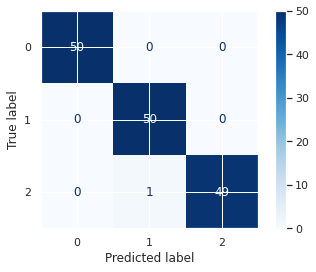

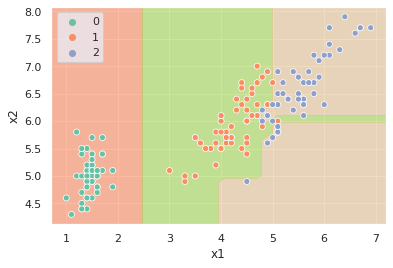

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=300, random_state = 42)
#las variables predictoras que separan bien las clases son petal leng  sepal width
#Y=iris.target 
y #etiquetas con nombres

#The shape of X should be [n_samples, n_features], you can transform X by
#X = X[:, None]
X=iris.data[:,2]             #petal length   =x1=iris_df['petal length (cm)']
X=np.c_[X,iris.data[:,0]]    #sepal length   =x2=iris_df['sepal length (cm)']
print(X.shape)


#Entrenamos el arbol en funcion de los elementos de mi dataframe
tree.fit(X, y)

### Inventamos una instancia
y_pred = tree.predict(X) # Hacemos la predicciṕn
print(y_pred) # imprimimos en pantalla la predicción

### Tomamos las instancias al azar
np.random.seed(7) # si quieres que sea al azar, cambia la semilla o comenta esta linea.
idxs = np.random.randint(X.shape[0], size=3)
instancias = X[idxs,:]
print(instancias)
### Predecimos
y_pred = tree.predict(instancias)
print(y_pred)
### Comparamos la etiqueta real con la predicha:
for i, idx in enumerate(idxs): #enumerate devuelve el valor y el indice del valor (su posicion)
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')


from sklearn.metrics import accuracy_score
# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X)
# Comaparamos con las etiquetas reales
Ac=accuracy_score(y_pred,y)
print(Ac) #presicion 75%aprox

#            real
#            si    no
#predicho si
#         no__________
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.0f') #es un heatmap de doble entrada



plt.figure()
ax = sns.scatterplot(X[:,0], X[:,1], hue=y_pred, palette='Set2', zorder=3) #graficamos los puntos predichos (entrenados) #iris_df.iloc[:,0] iris_df.iloc[:,2]
plt.legend()#.remove()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.axis('tight')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
xx, yy = np.meshgrid(np.linspace(*xlim, num=32),np.linspace(*ylim, num=32))
#https://www.kaggle.com/macespinoza/classification-decision-trees-and-k-nearest/notebook
print(yy.shape)
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
print(Z.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.6,levels=np.arange(n_classes + 1) - 0.5,cmap='Set2',zorder=1)#, clim=(y.min(), y.max()))                            #hace un contorno relleno donde se cumple la predicción, es decir el cluster de la frontera. en funcion del mesh
ax.set(xlim=xlim, ylim=ylim)
plt.show()


11. Vuelve a entrenar, pero esta vez agregando más features a `X`. ¿Mejora o empeora el desempeño?

    Deberia empeorar por la maldicion de la dimension

¿Qué ocurre con las fronteras de decisión?¿Tendrá alguna relación la cantidad de features con `max_depth` óptimo?


(150, 4)
[[1.6 5.  3.  0.2]
 [4.1 5.8 2.7 1. ]
 [5.6 6.3 2.9 1.8]]
[0 1 2]
Instancia 25. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 67. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 103. Etiqueta real: 2. Etiqueta predicha: 2
1.0
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
(50, 50)
(50, 50)


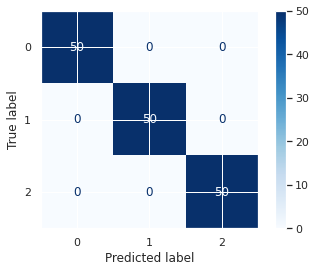

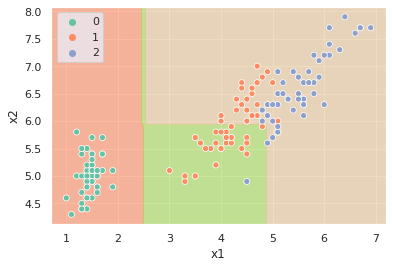

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10, random_state = 42)
#las variables predictoras que separan bien las clases son petal leng  sepal width
#x2=iris_df['sepal length (cm)']
#Y=iris.target 
y #etiquetas con nombres

#The shape of X should be [n_samples, n_features], you can transform X by
#X = X[:, None]
X=iris.data[:,2]             #petal length   =x1=iris_df['petal length (cm)']
X=np.c_[X,iris.data[:,0],iris.data[:,1],iris.data[:,3]]    #sepal length   =x2=iris_df['sepal length (cm)']
print(X.shape)

#Entrenamos el arbol en funcion de los elementos de mi dataframe
tree.fit(X, y)

### Inventamos una instancia
y_pred = tree.predict(X) # Hacemos la predicciṕn
#print(y_pred) # imprimimos en pantalla la predicción

### Tomamos las instancias al azar
np.random.seed(7) # si quieres que sea al azar, cambia la semilla o comenta esta linea.
idxs = np.random.randint(X.shape[0], size=3)
instancias = X[idxs,:]
print(instancias)
### Predecimos
y_pred = tree.predict(instancias)
print(y_pred)
### Comparamos la etiqueta real con la predicha:
for i, idx in enumerate(idxs):
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')


from sklearn.metrics import accuracy_score
# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
Ac=accuracy_score(y_pred,y)
print(Ac) #presicion 75%aprox

#            real
#            si    no
#predicho si
#         no__________
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.0f') #es un heatmap de doble entrada


plt.figure()
ax = sns.scatterplot(X[:,0], X[:,1], hue=y_pred, palette='Set2', zorder=3) #graficamos los puntos predichos (entrenados) #iris_df.iloc[:,0] iris_df.iloc[:,2]
plt.legend()#.remove()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.axis('tight')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
xx, yy = np.meshgrid(np.linspace(*xlim),np.linspace(*ylim))
#https://www.kaggle.com/macespinoza/classification-decision-trees-and-k-nearest/notebook
print(yy.shape)
Z = tree.predict(np.c_[xx.ravel(),yy.ravel(), yy.ravel(),xx.ravel()]).reshape(xx.shape)
print(Z.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.6,levels=np.arange(n_classes + 1) - 0.5,cmap='Set2',zorder=1)#, clim=(y.min(), y.max()))                            #hace un contorno relleno donde se cumple la predicción, es decir el cluster de la frontera. en funcion del mesh
ax.set(xlim=xlim, ylim=ylim)
plt.show()



12. **Para pensar:** ¿en qué consistirá un árbol de decisión sobre un único atributo? Por ejemplo, el largo del pétalo.

  Daría como resultado una separación de rama del tipo binario (si se cumple una condicion o no).
  https://www.lucidchart.com/pages/es/que-es-un-diagrama-de-arbol-de-decision
